In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading data

In [2]:
#load data
bd=pd.read_csv('StudentsPerformance.csv',sep=',')
#Peek of data
print(bd.head(10))

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                  

## Descriptive Statistics

In [17]:
#shape of data
print(bd.shape)
# data type
print(bd.dtypes)


(1000, 8)
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [18]:
print(bd.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [19]:
# Check whether there is missing value in any of the column 
#sum of all null values
print(bd.isnull().sum())
#there is no missing value

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [20]:
# Mean,median and mode of data
# descriptions
print(bd.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


## Grouping data

In [21]:
# display  the count 
print(bd.groupby('parental level of education').size())

parental level of education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
dtype: int64


In [22]:
print(bd.groupby('race/ethnicity').size())

race/ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
dtype: int64


In [23]:
print(bd.groupby('gender').size())

gender
female    518
male      482
dtype: int64


In [24]:
print(bd.groupby('lunch').size())

lunch
free/reduced    355
standard        645
dtype: int64


In [25]:
print(bd.groupby('test preparation course').size())

test preparation course
completed    358
none         642
dtype: int64


In [26]:
#Effect of gender on test performance
bd.groupby(['gender']).agg(['mean','min','median','max'])

math score                 reading score                 writing score  \
             mean min median  max          mean min median  max          mean   
gender                                                                          
female  63.633205   0     65  100     72.608108  17     73  100     72.467181   
male    68.728216  27     69  100     65.473029  23     66  100     63.311203   

                        
       min median  max  
gender                  
female  10     74  100  
male    15     64  100

Average writing and reading score of female students are higher than male students while average math score of male students are higher than female students.Minimum marks scored by girls is 0 in maths while minimum marks scored by boys is 27 in maths.

In [27]:
#Effect of lunch on test performance
bd.groupby(['lunch','gender']).agg(['mean','min','median','max'])

math score                 reading score                  \
                          mean min median  max          mean min median  max   
lunch        gender                                                            
free/reduced female  55.814815   0     57   93     67.386243  17   67.0  100   
             male    62.457831  27     62  100     61.542169  23   61.0  100   
standard     female  68.124620  19     67  100     75.607903  29   75.0  100   
             male    72.022152  30     72  100     67.537975  26   67.5  100   

                    writing score                  
                             mean min median  max  
lunch        gender                                
free/reduced female     66.444444  10     68  100  
             male       59.126506  15     59   93  
standard     female     75.927052  30     76  100  
             male       65.509494  22     67  100

Students whether male or female having standard lunch have highest average marks in all 3 subjects . Minimum marks of females having free lunch in reading and writing is less than male while Minimum marks of females having standard lunch in reading and writing is more than males. 

In [28]:
#Effect of race/ethnicity on test performance
bd.groupby(['race/ethnicity','gender']).agg(['mean','min','median','max'])

math score                 reading score             \
                            mean min median  max          mean min median   
race/ethnicity gender                                                       
group A        female  58.527778  34     57   92     69.000000  43   67.5   
               male    63.735849  28     63  100     61.735849  23   61.0   
group B        female  61.403846   8     62   97     71.076923  24   71.5   
               male    65.930233  30     65   94     62.848837  24   62.0   
group C        female  62.033333   0     63   96     71.944444  17   73.0   
               male    67.611511  27     68   98     65.424460  28   66.0   
group D        female  65.248062  26     65   98     74.046512  31   74.0   
               male    69.413534  39     71  100     66.135338  34   68.0   
group E        female  70.811594  32     71  100     75.840580  34   76.0   
               male    76.746479  30     78  100     70.295775  26   73.0   

                           writing score                  
                       max          mean min median  max  
race/ethnicity gender                                     
group A        female  100     67.861111  41   67.0   97  
               male     96     59.150943  19   60.0   92  
group B        female   97     70.048077  23   71.5   96  
               male     96     60.220930  15   60.0   92  
group C        female  100     71.777778  10   74.0  100  
               male    100     62.712230  27   62.0   95  
group D        female  100     75.023256  32   76.0  100  
               male     97     65.413534  34   67.0   99  
group E        female  100     75.536232  38   76.0  100  
               male    100     67.394366  22   70.0  100

Students of group E have highest average marks in all 3 subjects .

In [29]:
#Effect of test preparation course on test performance
bd.groupby(['test preparation course','gender']).agg(['mean','min','median','max'])

math score                 reading score      \
                                     mean min median  max          mean min   
test preparation course gender                                                
completed               female  67.195652  23     67   99     77.375000  40   
                        male    72.339080  39     73  100     70.212644  37   
none                    female  61.670659   0     62  100     69.982036  17   
                        male    66.688312  27     67   97     62.795455  23   

                                           writing score                  
                               median  max          mean min median  max  
test preparation course gender                                            
completed               female     78  100     78.793478  36     79  100  
                        male       71  100     69.793103  38     70  100  
none                    female     71  100     68.982036  10     70  100  
                        male       63   96     59.649351  15     60   92

Students who have completed the test preparation course have more average marks in all 3 subjects than students who don't have  test preparation course

In [30]:
#Effect of parental level of education on test performance
bd.groupby(['parental level of education','gender']).agg(['mean','min','median','max'])

math score                 reading score  \
                                         mean min median  max          mean   
parental level of education gender                                            
associate's degree          female  65.250000  26   65.0  100     74.120690   
                            male    70.764151  40   72.0  100     67.433962   
bachelor's degree           female  68.349206  29   67.0  100     77.285714   
                            male    70.581818  37   70.0  100     68.090909   
high school                 female  59.351064   8   61.0   99     68.202128   
                            male    64.705882  27   66.0   94     61.480392   
master's degree             female  66.500000  40   64.5   94     76.805556   
                            male    74.826087  46   79.0   95     73.130435   
some college                female  65.406780  19   65.5  100     73.550847   
                            male    69.009259  28   69.0  100     64.990741   
some high school            female  59.296703   0   63.0   97     69.109890   
                            male    67.840909  30   68.0   94     64.693182   

                                                   writing score             \
                                   min median  max          mean min median   
parental level of education gender                                            
associate's degree          female  31   75.5  100     74.000000  38   74.0   
                            male    37   68.0  100     65.405660  35   65.5   
bachelor's degree           female  41   76.0  100     78.380952  38   80.0   
                            male    42   67.0  100     67.654545  38   68.0   
high school                 female  24   69.5   99     66.691489  23   68.0   
                            male    24   61.5   91     58.539216  15   58.5   
master's degree             female  53   74.0  100     77.638889  54   76.5   
                            male    42   77.0   89     72.608696  46   74.0   
some college                female  38   74.0  100     74.050847  32   74.5   
                            male    23   63.5   97     63.148148  19   62.5   
some high school            female  17   71.0  100     68.285714  10   72.0   
                            male    26   66.0   88     61.375000  22   61.5   

                                         
                                    max  
parental level of education gender       
associate's degree          female  100  
                            male     95  
bachelor's degree           female  100  
                            male    100  
high school                 female  100  
                            male     86  
master's degree             female  100  
                            male     90  
some college                female   99  
                            male     99  
some high school            female  100  
                            male     87

Girls whose parents have bachelor's degree score the highest average marks in all 3 subjects while boys whose parents have master's degree score the highest average marks in all 3 subjects.

## Pairwise correlation

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


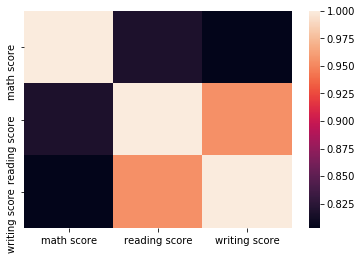

In [31]:
correlation = bd.corr()
print(correlation)
sns.heatmap(correlation)

As correlation between different colums are positive i.e with increase/decrease in one column the other one also increases/decreases.As magnitude increases , their dependency on each other increases. 

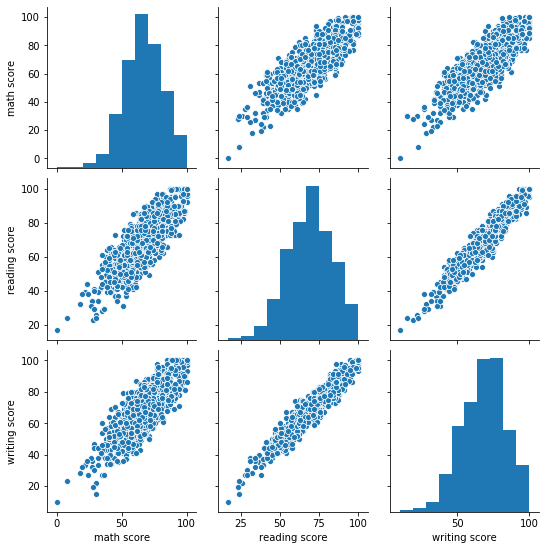

In [32]:
sns.pairplot(bd)

## Data Visualisation

## OUTLIERS

## Identifying Outliers with Skewness

In [14]:
print(bd['math score'].skew())
bd['math score'].describe()

-0.27893514909431694


count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

The skewness value of -0.27 shows that the variable 'math score' has a left-skewed distribution, indicating the presence of extreme lower values. 

In [16]:
print(bd['writing score'].skew())
bd['writing score'].describe()

-0.28944397150761897


count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing score, dtype: float64

The skewness value of -0.289 shows that the variable 'writing score' has a left-skewed distribution, indicating the presence of extreme lower values.

In [15]:
print(bd['reading score'].skew())
bd['reading score'].describe()

-0.25910451810923063


count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64

The skewness value of -0.259 shows that the variable 'reading score' has a left-skewed distribution, indicating the presence of extreme lower values

## Identifying Outliers with Visualisation

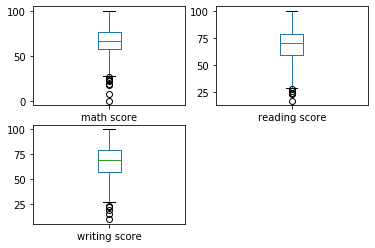

In [7]:

bd.plot(kind='box', subplots=True,layout=(2,2))
plt.show()

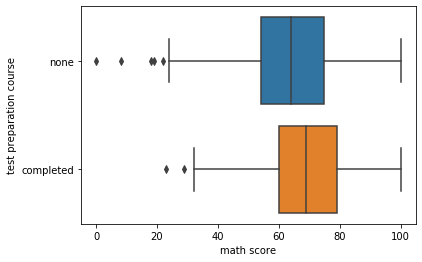

In [10]:
#comparison of other with math score
sns.boxplot(x='math score',y='test preparation course', data=bd)


Students who have not completed test preparation course have more marks that are numerically distant from rest of marks than students who have completed their course.

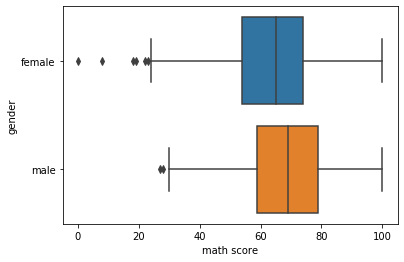

In [9]:
sns.boxplot(x='math score',y='gender', data=bd)


 Math scores of female students are more scattered as compared to male students.

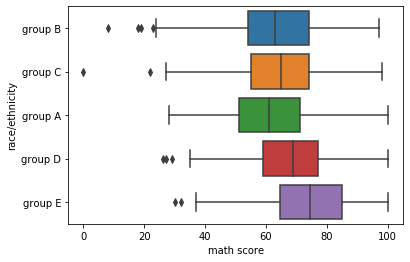

In [12]:
sns.boxplot(x='math score',y='race/ethnicity', data=bd)


Group B have more outliers as compared to other groups but Data points of group C are more numerically distant from rest of data.

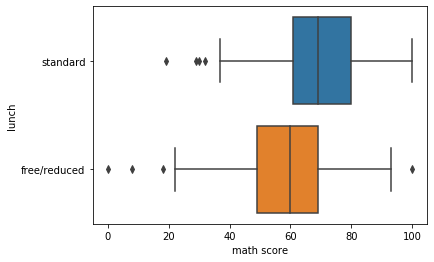

In [13]:
sns.boxplot(x='math score',y='lunch', data=bd)


Students having free/reduced lunch have more scattered math marks

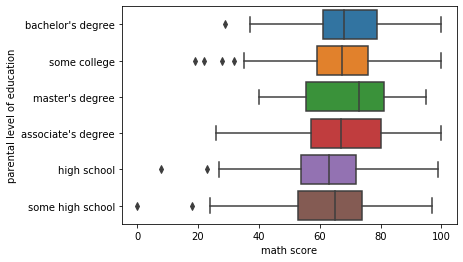

In [14]:
sns.boxplot(x='math score',y='parental level of education', data=bd)


Students whose parents are from some college have more outliers but data points of students whose parents are from high school and some high school are more distant.

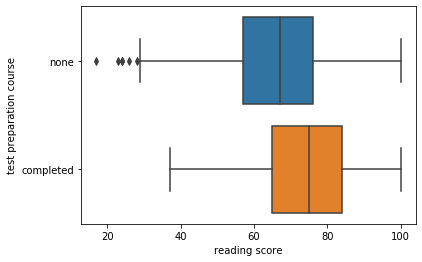

In [15]:
#comparison of other with reading score
sns.boxplot(x='reading score',y='test preparation course', data=bd)


Reading score of students who completed their test preparation course have no outliers while Reading score of students who don't have their test preparation course are scattered.

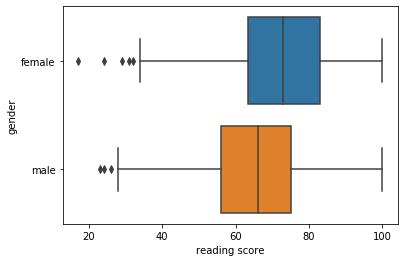

In [16]:
sns.boxplot(x='reading score',y='gender', data=bd)


Reading scores of female students are more scattered as compared to male students.

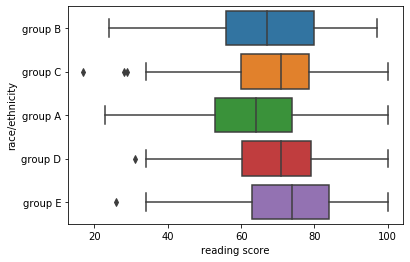

In [17]:
sns.boxplot(x='reading score',y='race/ethnicity', data=bd)



Large no of students of group C have  marks which are numerically distant from rest while group A and B have no outliers.

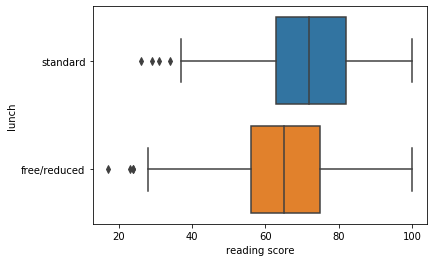

In [18]:
sns.boxplot(x='reading score',y='lunch', data=bd)


Students having standard lunch have more scattered reading marks.

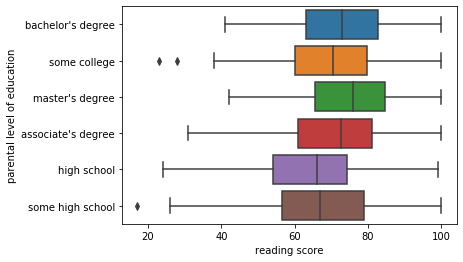

In [20]:
sns.boxplot(x='reading score',y='parental level of education', data=bd)


Only students whose parents have degree from some college and some high school have outliers.

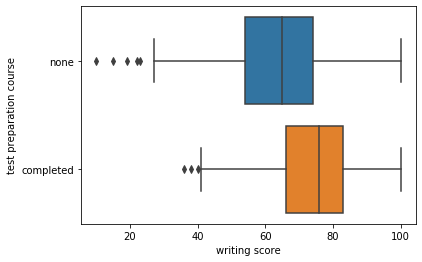

In [21]:
#comparison of other with writing score
sns.boxplot(x='writing score',y='test preparation course', data=bd)


Writing score of students who don't have test preparation course have more outliers.

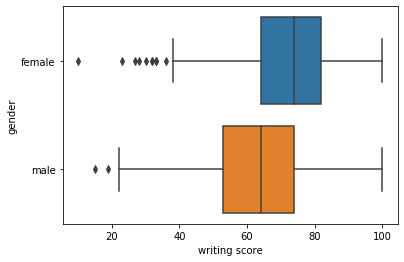

In [22]:
sns.boxplot(x='writing score',y='gender', data=bd)


Writing scores of female students are more scattered as compared to male students.

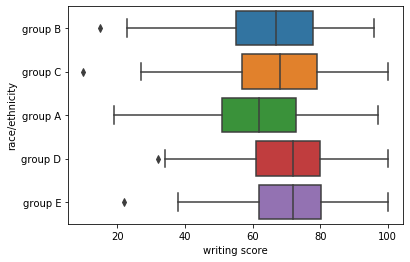

In [23]:
sns.boxplot(x='writing score',y='race/ethnicity', data=bd)


Students of group C and E have more scattered marks.

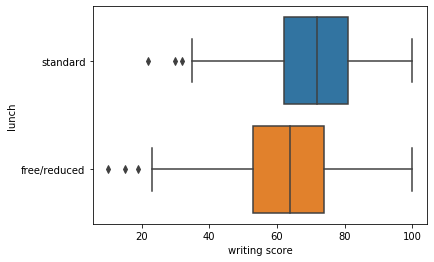

In [24]:
sns.boxplot(x='writing score',y='lunch', data=bd)

Students having free/reduced lunch have evenly scattered writing marks

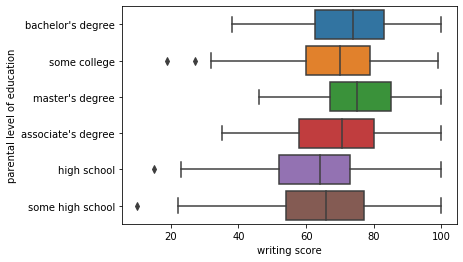

In [25]:
sns.boxplot(x='writing score',y='parental level of education', data=bd)

In [ ]:
Students whose parents have degree from some college , high school and some high school have outliers.

## Inferential Statistics

In [34]:
#Probability of Students who score more than 50 percent marks in maths
total = bd.shape[0]
students_score = bd[bd['math score'] > 50].shape[0]

probability_of_students = (students_score/total)*100
print("Probability of Students Scoring more than 50 marks in Maths :", probability_of_students)

Probability of Students Scoring more than 50 marks in Maths : 85.0


In [35]:
#Probability of Students who score more than 50 percent marks in reading
total = bd.shape[0]
students_score = bd[bd['reading score'] > 50].shape[0]

probability_of_students = (students_score/total)*100
print("Probability of Students Scoring more than 50 marks in Reading :", probability_of_students)

Probability of Students Scoring more than 50 marks in Reading : 90.3


In [36]:
#Probability of Students who score more than 50 percent marks in writing
total = bd.shape[0]
students_score = bd[bd['writing score'] > 50].shape[0]

probability_of_students = (students_score/total)*100
print("Probability of Students Scoring more than 50 marks in Writing :", probability_of_students)

Probability of Students Scoring more than 50 marks in Writing : 87.6


In [37]:
#Probability of Students who score more than 90 percent marks in maths
total = bd.shape[0]
students_score = bd[bd['math score'] > 90].shape[0]

probability_of_students = (students_score/total)*100
print("Probability of Students Scoring more than 90 marks in Maths :", probability_of_students)

Probability of Students Scoring more than 90 marks in Maths : 5.0


In [38]:
#Probability of Students who score more than 90 percent marks in reading
total = bd.shape[0]
students_score = bd[bd['reading score'] > 90].shape[0]

probability_of_students = (students_score/total)*100
print("Probability of Students Scoring more than 90 marks in reading :", probability_of_students)

Probability of Students Scoring more than 90 marks in Maths : 6.2


In [39]:
#Probability of Students who score more than 90 percent marks in writing
total = bd.shape[0]
students_score = bd[bd['writing score'] > 90].shape[0]

probability_of_students = (students_score/total)*100
print("Probability of Students Scoring more than 90 marks in writing :", probability_of_students)

Probability of Students Scoring more than 90 marks in writing : 6.800000000000001


In [41]:
#Probability of Students who score more than 95 percent marks in three subjects
total = bd.shape[0]
students_score = bd[(bd['math score'] > 95) &(bd['writing score'] > 95) & (bd['reading score'] >95)].shape[0]

probability_of_students = (students_score/total)*100
print("Probability of Students Scoring more than 95 marks in 3 subjects :", probability_of_students)

Probability of Students Scoring more than 95 marks in 3 subjects : 1.0


In [42]:
#Probability of Students passsing all three subjects
total = bd.shape[0]
students_score = bd[(bd['math score'] > 33) &(bd['writing score'] > 33) & (bd['reading score'] >33)].shape[0]

probability_of_students = (students_score/total)*100
print("Probability of Students passing all 3 subjects :", probability_of_students)

Probability of Students passing all 3 subjects : 97.7


In [34]:
#Probability of girls who score more than 90 percent marks in three subjects
total = bd.shape[0]
students_score = bd[(bd['gender'] == 'female') &(bd['math score'] > 90) &(bd['writing score'] > 90) & (bd['reading score'] >90)].shape[0]

probability_of_students = (students_score/total)*100
print("Probability of girls Scoring more than 90 marks in 3 subjects :", probability_of_students)

Probability of girls Scoring more than 90 marks in 3 subjects : 1.7000000000000002


In [33]:
#Probability of girls passing all the  three subjects
total = bd.shape[0]
students_score = bd[(bd['gender'] == 'female') &(bd['math score'] > 33) &(bd['writing score'] > 33) & (bd['reading score'] >33)].shape[0]

probability_of_students = (students_score/total)*100
print("Probability of girls passing all the 3 subjects :", probability_of_students)

Probability of girls passing all the 3 subjects : 50.2
